# Minimo Producto Viable

Proceso de uso:

+ Captura imagen por webcam de un codigo de barras
+ Decodifica codigo de barras
+ Busca el producto en la base de datos
+ Busca productos similares

In [1]:
# librerias

import cv2
from pyzbar.pyzbar import decode
from PIL import Image
import pandas as pd
import ast
import pymongo
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
# captura por camara

def captura():
    cam=cv2.VideoCapture(0)
    while 1:
        ret, frame=cam.read()
        cv2.imshow('Captura', frame)
        
        if ret==False: break
        
        key=cv2.waitKey(1)
        
        if key%256==27: break # tecla ESC
        
        elif key%256==32: # SPACE
            img_name='capturas/codigo.png'
            cv2.imwrite(img_name, frame)
            print ('Captura guardada\n\n')
            break
            
    cam.release()
    cv2.destroyAllWindows()
    plt.imshow(plt.imread('capturas/codigo.png'));


In [3]:
# decodifica codigo de barras

def decodifica():
    codigo=decode(Image.open('capturas/codigo.png'))[0][0]
    return codigo

In [9]:
# conexion base de datos

def base_datos(colec):
    
    df=pd.DataFrame(list(colec.find()))
    
    return df

In [5]:
# busqueda elemento en base de datos

def elemento(df, codigo):
    
    elem=df.loc[df.ean==str(ast.literal_eval(codigo.decode('utf8')))[0:-1]]
    
    display(elem)

    res=requests.get(elem.URL[elem.index[0]], stream=True)
    img=Image.open(res.raw)

    plt.imshow(img);
    
    return elem

In [6]:
# busqueda de productos similares (brand, color, size, price)

def busqueda_similares(df, elem, campo):
    
    productos=df.loc[df[campo]==elem[campo][elem.index[0]]]
    
    return productos

In [ ]:
# funcion para ver las fotos de los productos similares

def fotos(productos):
    
    urls=productos.URL.tolist()
    
    for e in urls:
        try:
            res=requests.get(e, stream=True)
            img=Image.open(res.raw)

            plt.imshow(img)
            plt.show();

        except:
            print('no hay foto')

**Proceso**

Captura guardada




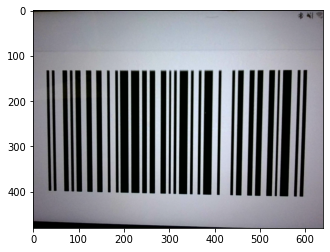

In [7]:
captura()   # captura el codigo de barras

In [10]:
codigo=decodifica()


cliente=pymongo.MongoClient()

db=cliente.supply
coleccion=db.zapatos

data=base_datos(coleccion)

,_id,brand,color,size,price,URL,ean,upc
3,5f37c5bafd075a485e63774a,MUK LUKS,Grey,9,47.0,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743


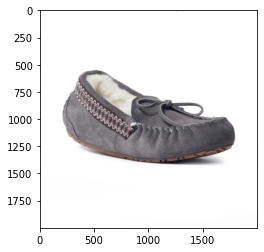

In [11]:
elem=elemento(data, codigo)

In [13]:
busqueda_similares(data, elem, 'color')

,_id,brand,color,size,price,URL,ean,upc
0,5f37c5bafd075a485e637747,MUK LUKS,Grey,10,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540363,033977045743
1,5f37c5bafd075a485e637748,MUK LUKS,Grey,7,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,725177540370,033977045743
2,5f37c5bafd075a485e637749,MUK LUKS,Grey,6,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776092321,033977045743
3,5f37c5bafd075a485e63774a,MUK LUKS,Grey,9,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
4,5f37c5bafd075a485e63774b,MUK LUKS,Grey,8,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110773,033977045743
5,5f37c5bafd075a485e63774c,MUK LUKS,Grey,10,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110797,033977045743
6,5f37c5bafd075a485e63774d,MUK LUKS,Grey,7,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110803,033977045743
7,5f37c5bafd075a485e63774e,MUK LUKS,Grey,6,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,797776110780,033977045743
8,5f37c5bafd075a485e63774f,MUK LUKS,Grey,9,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197247475,033977045743
9,5f37c5bafd075a485e637750,MUK LUKS,Grey,8,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197247482,033977045743


In [15]:
busqueda_similares(data, elem, 'size')

,_id,brand,color,size,price,URL,ean,upc
3,5f37c5bafd075a485e63774a,MUK LUKS,Grey,9,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
8,5f37c5bafd075a485e63774f,MUK LUKS,Grey,9,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197247475,033977045743
13,5f37c5bafd075a485e637754,MUK LUKS,Black,9,24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,797776111022,033977045903
18,5f37c5bafd075a485e637759,MUK LUKS,Grey,9,33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,799439792500,033977045958
22,5f37c5bafd075a485e63775d,Soft Ones,Brown Tweed,9,14.00,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,799439792548,033977052222
...,...,...,...,...,...,...,...,...
8217,5f37c5bafd075a485e639760,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,802126812341,"889436406774,889436406798,889436406804,8894364..."
8228,5f37c5bafd075a485e63976b,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,803235390508,"889436406774,889436406798,889436406804,8894364..."
8239,5f37c5bafd075a485e639776,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,799366584872,"889436406774,889436406798,889436406804,8894364..."
8250,5f37c5bafd075a485e639781,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,800414125890,"889436406774,889436406798,889436406804,8894364..."


In [ ]:
productos=busqueda_similares(data, elem, 'size')

display(productos)

fotos(productos)

,_id,brand,color,size,price,URL,ean,upc
3,5f37c5bafd075a485e63774a,MUK LUKS,Grey,9,47.00,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197194311,033977045743
8,5f37c5bafd075a485e63774f,MUK LUKS,Grey,9,35.25,https://i5.walmartimages.com/asr/421de5d5-3a74...,701197247475,033977045743
13,5f37c5bafd075a485e637754,MUK LUKS,Black,9,24.75,https://i5.walmartimages.com/asr/950d38a5-0113...,797776111022,033977045903
18,5f37c5bafd075a485e637759,MUK LUKS,Grey,9,33.00,https://i5.walmartimages.com/asr/5e137bc3-c900...,799439792500,033977045958
22,5f37c5bafd075a485e63775d,Soft Ones,Brown Tweed,9,14.00,https://i5.walmartimages.com/asr/7b979ba6-fa0a...,799439792548,033977052222
...,...,...,...,...,...,...,...,...
8217,5f37c5bafd075a485e639760,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,802126812341,"889436406774,889436406798,889436406804,8894364..."
8228,5f37c5bafd075a485e63976b,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,803235390508,"889436406774,889436406798,889436406804,8894364..."
8239,5f37c5bafd075a485e639776,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,799366584872,"889436406774,889436406798,889436406804,8894364..."
8250,5f37c5bafd075a485e639781,asics,"Navy Multi,Silver Teal,AquariumFlashCoralBlueJ...",9,119.99,https://media.kohlsimg.com/is/image/kohls/2724...,800414125890,"889436406774,889436406798,889436406804,8894364..."


no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
no hay foto
